In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3921,ham,"Oh really? perform, write a paper, go to a mov...",NaN,NaN,NaN
1824,ham,Sent me ur email id soon,NaN,NaN,NaN
5398,ham,Hi. Hope you had a good day. Have a better night.,NaN,NaN,NaN
3983,ham,"Hey, I missed you tm of last night as my phone...",NaN,NaN,NaN
1834,ham,I have a rather prominent bite mark on my righ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.DAta Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)  #permanent removal

In [8]:
df.sample(2)

,v1,v2
4079,ham,"Sir, good morning. Hope you had a good weekend..."
5238,ham,Yeah I can still give you a ride


In [9]:
#renaming the coulmns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(2)

,target,text
558,ham,Hi Princess! Thank you for the pics. You are v...
3660,ham,Well then you have a great weekend!


In [11]:
# applying labelEncoder to change target into numbers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

2.EDA

In [18]:
# It gives understanding of data.
# 

In [19]:
# Data per category
df['target'].value_counts()   #ham--> 0 and Spam--> 1

0    4516
1     653
Name: target, dtype: int64

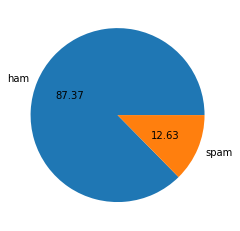

In [20]:
#use pi-chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")#autopct as we want the percentage also and 0.2f means upto 2 decimals
plt.show()# to avoid unwanted extra peice of code as output

In [21]:
# Insight : Data is Imbalanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#adding columns as following

In [24]:
# no. of charcaters in text.
df['num_characters']=df['text'].apply(len)

In [25]:
# no.of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
# no.of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# analysing for Ham and Spam messages individually

In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #Ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
# plot histograms

import seaborn as sns




<AxesSubplot:xlabel='num_characters', ylabel='Count'>

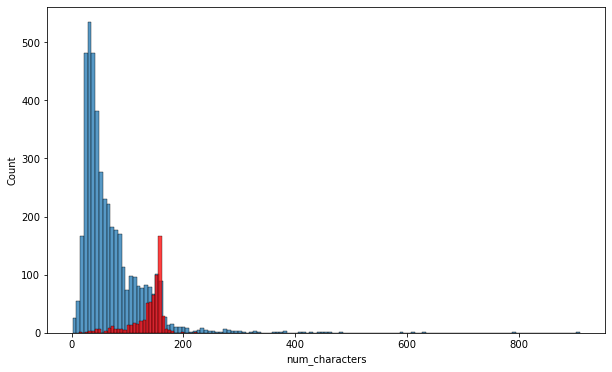

In [33]:
plt.figure(figsize=(10,6))#figure size
sns.histplot(df[df['target']==0]['num_characters']) #ham
sns.histplot(df[df['target']==1]['num_characters'],color='red')#spam

<AxesSubplot:xlabel='num_words', ylabel='Count'>

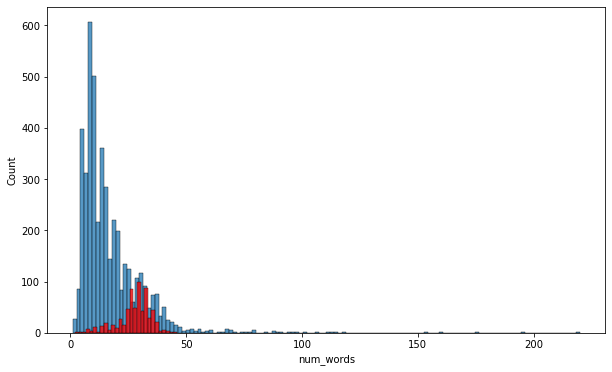

In [34]:
plt.figure(figsize=(10,6))#figure size
sns.histplot(df[df['target']==0]['num_words']) #ham
sns.histplot(df[df['target']==1]['num_words'],color='red')#spam

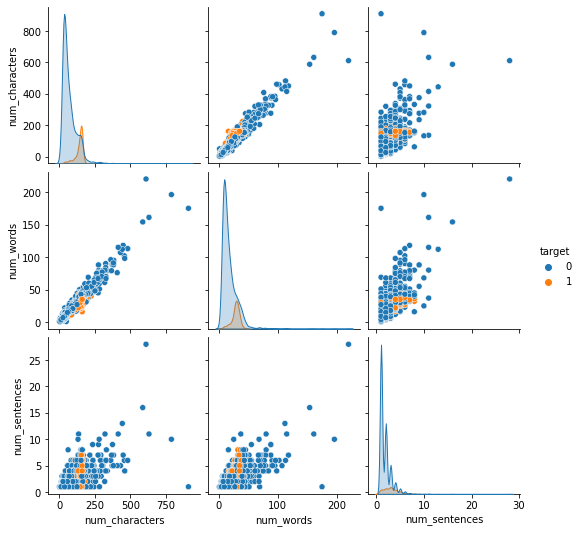

In [35]:
sns.pairplot(df,hue='target') # for all plot relation with each other

In [36]:
df.corr()# for correlation coefficients


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

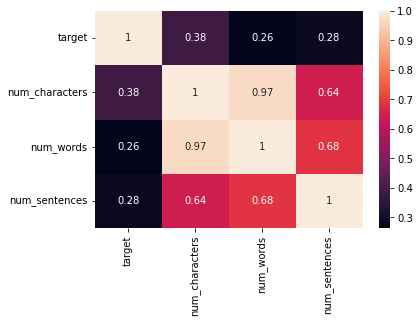

In [37]:
sns.heatmap(df.corr(),annot=True) # for correlation coefficients in a heatmap

In [38]:
# from heatmap.
#num_characters , num_words, num_sentences have very hight co-linearity. It's a case of multi-colinearity.
# We will take only one , Which has highest colinearity with target__that is --> num_characters

# 3.Text Preprocessing (Data Preprocessing)


1. Lowercase
2. Tokeniztion
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [39]:
# nltk.word_tokenize(text)--- # word tokenization 

from nltk.corpus import stopwords  # for Stopwords
stopwords.words('english')

import string      # for puctuation
string.punctuation

from nltk.stem.porter import PorterStemmer  # for stemming (changing the word to it's root word)
ps=PorterStemmer()



In [40]:
# creating a function to do all these tasks.
def transform_text(text):
    text=text.lower() #lowercase
    text=nltk.word_tokenize(text) #word tokenize
    
    y=[]  # creating an empty list to store cleaned text.
    
    for i in text:
        if i.isalnum():#if i is alphanumeric then append i into the list
            y.append(i)
    
    text=y[:] # copying list y in variable --> text
    y.clear() # cleared y to store new text
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)  # returning a joined string---> text


In [41]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [42]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
# Word Cloud
!pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc=WordCloud(width=1000 , height =1000,min_font_size=10,background_color='white')

In [47]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

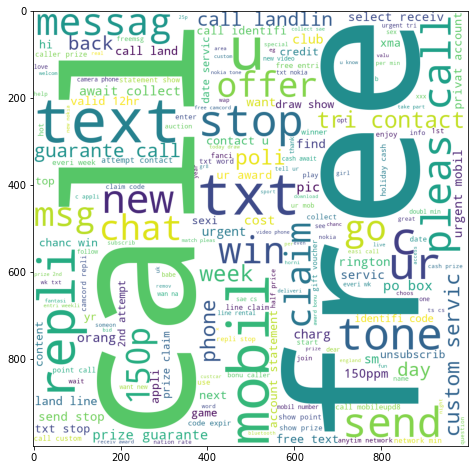

In [48]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [49]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

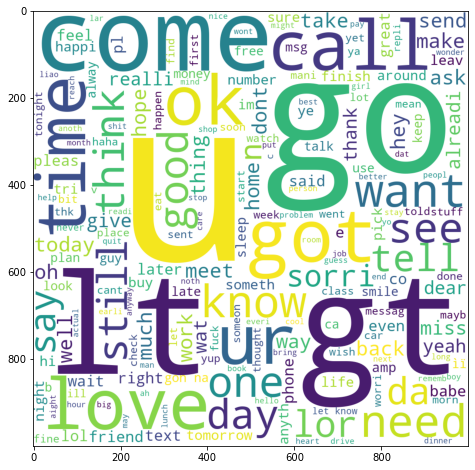

In [50]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)

In [51]:
#(most used) Top n words from both ham and spam category.

In [52]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist(): # changed spam transformed text into a list and them iterating.
    for word in msg.split(): # splited each msg in words and iterating
        spam_corpus.append(word) # storing each word in spam_corpus list

In [53]:
len(spam_corpus)

9939

In [54]:
#from collections import Counter
#pd.DataFrame(Counter((spam_corpus).most_common(30))) # convert this corpus to a dictionary having key as word and values as frequency of word
#then pd.DataFrame will convert it into a table or Dataframe

C:\Users\abhig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


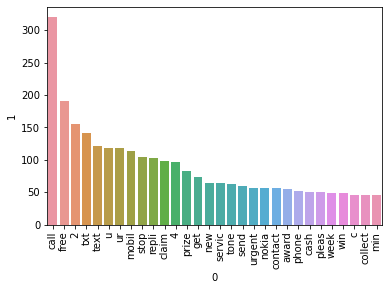

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')# rotating the graph
plt.show()

In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist(): # changed spam transformed text into a list and them iterating.
    for word in msg.split(): # splited each msg in words and iterating
        ham_corpus.append(word) # storing each word in spam_corpus list
        
len(ham_corpus)

35394

C:\Users\abhig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


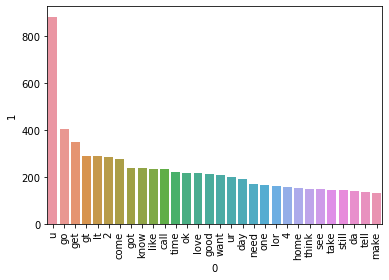

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')# rotating the graph
plt.show()

# 4. Model Building

In [72]:
#Vectorization --- Transformed_test into numbers(vectors)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [74]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
Y=df['target'].values 

In [76]:
#Split Data

In [77]:
from sklearn.model_selection import train_test_split # for splitting data in training data and test data

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [79]:
#modeling

In [80]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # import all naive bayes algo
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score  # importing martix

In [81]:
gnb=GaussianNB()  # creating object for each naive bayes algo
mnb=MultinomialNB()
bnb=BernoulliNB()

In [82]:
####spam Classification is a high precision problem so precision should be high. as we are dealing with imbalanced data.
# so more focus will be on @ precision_score

In [83]:
gnb.fit(X_train,Y_train)        
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [84]:
mnb.fit(X_train,Y_train)        
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [85]:
bnb.fit(X_train,Y_train)        
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [86]:
## As MultinomialNB with Tfidf Vectorizer giving highest precision although the accuracy is little less. 
#Here mnb will be prefered. Here No false positive result in mnb.

# Creating Pipeline for App
1. Text-Preprocessing
2. Text Vectorization
3. Prediction 
4. Display

In [87]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))